## **ML Assignment 6 - Image Classification**
Submitted by Kshitij Mittal - 05/10/23

----
### Importing Packages

In [1]:
import tensorflow as tf
from tensorflow import keras

2023-05-08 11:01:26.258967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 1000

----
###  1. Data Processing: 

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values to [0,1]
    shear_range=0.2,          # Shear images randomly up to 20%
    zoom_range=0.2,           # Zoom in randomly up to 20%
    horizontal_flip=True,     # Flip images horizontally
)
train_dir='/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_train'
train_generator=train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 88 images belonging to 4 classes.


In [23]:
# Seing classes to be predicted 
train_generator.class_indices

{'category 1': 0, 'category 2': 1, 'category 3': 2, 'category 4': 3}

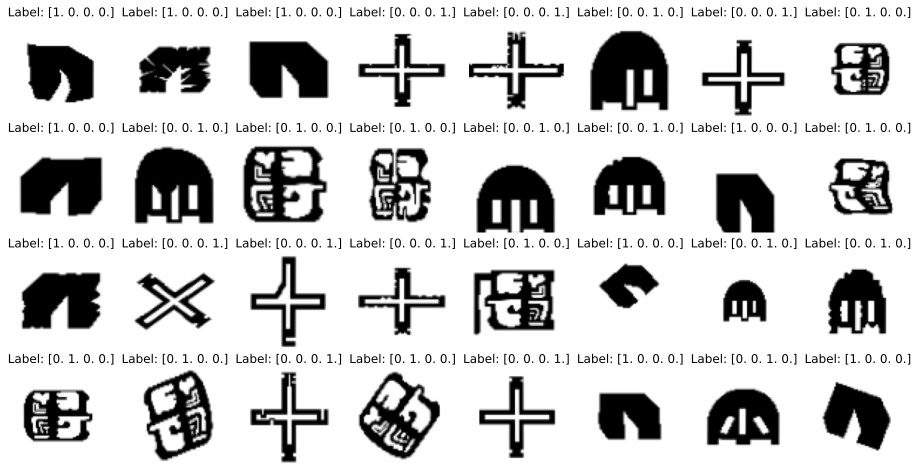

In [22]:
# Get a batch of images and their corresponding labels
images, labels = train_generator.next()

# Plot the images in a grid
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
axes = axes.ravel()
for i in range(32):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title('Label: {}'.format(labels[i]))
plt.show()

* Because we specified a batch size of 32, we can see 32 images from the generator out of 88 total images.
* We will need to predict for 4 total classes (obtained from the name of sub-directories in the training directory)

----
### 2. Initial Classifier Build: 

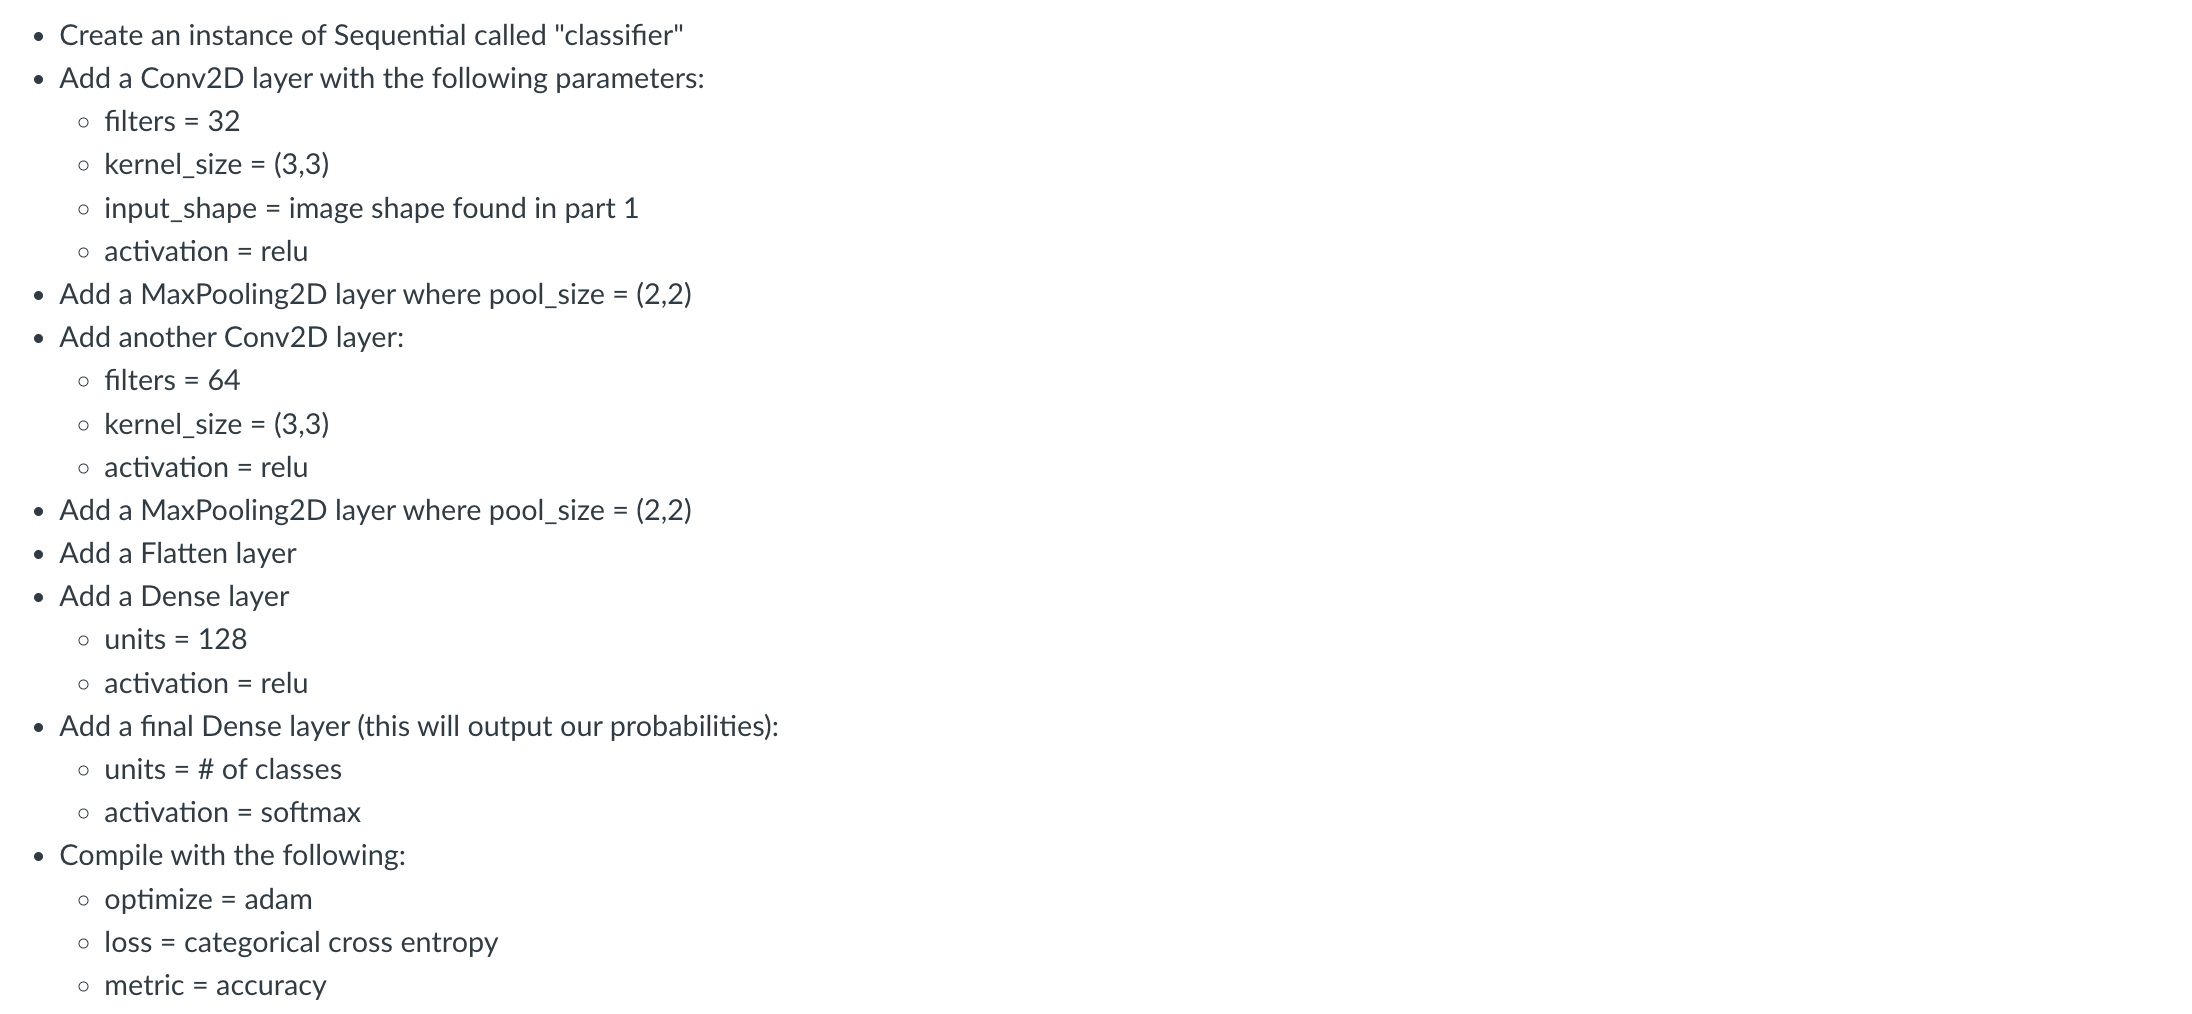

In [28]:
from tensorflow.keras import layers
from keras.layers import Conv2D

classifier=keras.Sequential(
    [
        layers.Conv2D(filters= 32, kernel_size=(3,3), activation='relu',input_shape=(64,64,3)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(filters= 64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(units=128, activation='relu'),
        layers.Dense(units=4, activation='softmax')
    ]
)

classifier.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [29]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

-----
### 3: Model Runs

In [41]:
# a) Use .fit() with the training set. For the first run, use the following parameters: 
classifier.fit(x=images, y=labels, epochs=3, steps_per_epoch=3)

# b) save model to a file
classifier.save('my_model.h6')
print("Saved model")

Epoch 1/3
3/3 [==============================] - 0s 17ms/step - loss: 5.2184e-04 - accuracy: 1.0000
Epoch 2/3
3/3 [==============================] - 0s 15ms/step - loss: 3.5841e-04 - accuracy: 1.0000
Epoch 3/3
3/3 [==============================] - 0s 15ms/step - loss: 2.4056e-04 - accuracy: 1.0000


INFO:tensorflow:Assets written to: my_model.h6/assets


INFO:tensorflow:Assets written to: my_model.h6/assets


Saved model


In [42]:
# c) Predict using the model built in step 2

import os, glob
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h6')
print("Loaded model from disk")

# test data path
img_dir = "/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test"

# iterate over each test image
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)

# print the files in the dataset_test folder 
for f in files:
    print(f)

Loaded model from disk
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/C033.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/1022.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/4011.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/1053.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/6051.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/4053.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codebase/06_MachineLearning/05_Comp_Vision/01_Datasets/dataset_test/C014.png
/Users/kshitijmittal/Documents/UChicago Acad/uchicago_codeba

In [59]:
# make a prediction and add to results 
data = []
results = []
for f1 in files:
    img = image.load_img(f1, target_size = (64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    data.append(img)
    result = model.predict(img)
    r = np.argmax(result, axis=1)
    results.append(r[0])

results

1/1 [==============================] - 0s 21ms/step


[3, 0, 3, 0, 1, 2, 3, 1]

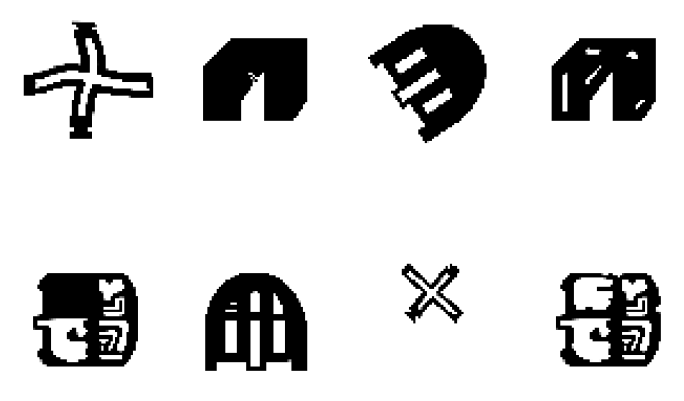

In [57]:
# d) Determine accuracy.

fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes_flatten = np.ravel(axes)

for i in range(len(files)):
    # load the image and resize it to (64, 64)
    img = image.load_img(files[i], target_size=(64, 64))
    # convert the image to a NumPy array
    img_arr = image.img_to_array(img)
    # plot the image
    axes_flatten[i].imshow(img_arr.astype(int))
    axes_flatten[i].axis('off')

    
plt.show()

From manual inspection, the actual test labels should be:

[3, 0, 2, 0, 1, 2, 3, 1]

In [62]:
from sklearn.metrics import accuracy_score

test_labels=[3, 0, 2, 0, 1, 2, 3, 1]
print("Test Accuracy is:",sklearn.metrics.accuracy_score(test_labels, results))

Test Accuracy is: 0.875


In [68]:
# e) Run this process for the following combinations:
# * (steps_per_epoch: 1, epochs: 1)
# * (steps_per_epoch: 1, epochs: 2)
# * (steps_per_epoch: 1, epochs: 3)
# * (steps_per_epoch: 2, epochs: 4)
# * (steps_per_epoch: 2, epochs: 5)
# * (steps_per_epoch: 2, epochs: 6)
# * (steps_per_epoch: 3, epochs: 7)
# * (steps_per_epoch: 3, epochs: 8)
# * (steps_per_epoch: 5, epochs: 9)
# * (steps_per_epoch: 5, epochs: 10)

comb_list=[[1,1],[1,2],[1,3],[2,4],[2,5],[2,6],[3,7],[3,8],[5,9],[5,10]]
steps_p_ep=[]
ep=[]
test_acc=[]

for i in range(len(comb_list)):
    print(f'Steps per Epoch: {comb_list[i][0]}')
    steps_p_ep.append(comb_list[i][0])

    print(f'Epochs: {comb_list[i][1]}')
    ep.append(comb_list[i][1])

    classifier=keras.Sequential(
        [
        layers.Conv2D(filters= 32, kernel_size=(3,3), activation='relu',input_shape=(64,64,3)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(filters= 64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(units=128, activation='relu'),
        layers.Dense(units=4, activation='softmax')
        ])
    classifier.compile(
        loss=keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"])
    
    classifier.fit(x=images, y=labels, epochs=comb_list[i][1], steps_per_epoch=comb_list[i][0])
    classifier.save("my_model_" + str(i)+ ".h6")
    print("saved model")

    model = load_model("my_model_" + str(i)+ ".h6")
    print(f'Loaded model {i} from disk')

    data = []
    results = []
    for f1 in files:
        img = image.load_img(f1, target_size = (64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        data.append(img)
        result = model.predict(img)
        r = np.argmax(result, axis=1)
        results.append(r[0])
    
    test_labels=[3, 0, 2, 0, 1, 2, 3, 1]
    print(f'Test Accuracy is for model {i}:',sklearn.metrics.accuracy_score(test_labels, results))
    test_acc.append(sklearn.metrics.accuracy_score(test_labels, results))
    print('--------------------')
    print('\n')


Steps per Epoch: 1
Epochs: 1
1/1 [==============================] - 0s 323ms/step - loss: 1.4823 - accuracy: 0.2188


INFO:tensorflow:Assets written to: my_model_0.h6/assets


INFO:tensorflow:Assets written to: my_model_0.h6/assets


saved model
Loaded model 0 from disk
1/1 [==============================] - 0s 22ms/step
Test Accuracy is for model 0: 0.375
--------------------


Steps per Epoch: 1
Epochs: 2
Epoch 1/2
1/1 [==============================] - 0s 306ms/step - loss: 1.3591 - accuracy: 0.2500
Epoch 2/2
1/1 [==============================] - 0s 40ms/step - loss: 1.2010 - accuracy: 0.5000


INFO:tensorflow:Assets written to: my_model_1.h6/assets


INFO:tensorflow:Assets written to: my_model_1.h6/assets


saved model
Loaded model 1 from disk
1/1 [==============================] - 0s 22ms/step
Test Accuracy is for model 1: 0.25
--------------------


Steps per Epoch: 1
Epochs: 3
Epoch 1/3
1/1 [==============================] - 0s 300ms/step - loss: 1.3997 - accuracy: 0.1250
Epoch 2/3
1/1 [==============================] - 0s 37ms/step - loss: 0.9386 - accuracy: 0.6875
Epoch 3/3
1/1 [==============================] - 0s 38ms/step - loss: 1.1588 - accuracy: 0.5938


INFO:tensorflow:Assets written to: my_model_2.h6/assets


INFO:tensorflow:Assets written to: my_model_2.h6/assets


saved model
Loaded model 2 from disk
1/1 [==============================] - 0s 19ms/step
Test Accuracy is for model 2: 0.625
--------------------


Steps per Epoch: 2
Epochs: 4
Epoch 1/4


2/2 [==============================] - 0s 20ms/step - loss: 1.5534 - accuracy: 0.2188
Epoch 2/4
2/2 [==============================] - 0s 20ms/step - loss: 1.2143 - accuracy: 0.4688
Epoch 3/4
2/2 [==============================] - 0s 21ms/step - loss: 0.8178 - accuracy: 0.8125
Epoch 4/4
2/2 [==============================] - 0s 23ms/step - loss: 0.5860 - accuracy: 0.9062


INFO:tensorflow:Assets written to: my_model_3.h6/assets


INFO:tensorflow:Assets written to: my_model_3.h6/assets


saved model
Loaded model 3 from disk
1/1 [==============================] - 0s 20ms/step
Test Accuracy is for model 3: 0.75
--------------------


Steps per Epoch: 2
Epochs: 5
Epoch 1/5
2/2 [==============================] - 0s 22ms/step - loss: 1.4531 - accuracy: 0.2188
Epoch 2/5
2/2 [==============================] - 0s 21ms/step - loss: 1.1164 - accuracy: 0.6250
Epoch 3/5
2/2 [==============================] - 0s 22ms/step - loss: 0.5931 - accuracy: 0.9062
Epoch 4/5
2/2 [==============================] - 0s 21ms/step - loss: 0.3818 - accuracy: 0.9375
Epoch 5/5
2/2 [==============================] - 0s 22ms/step - loss: 0.1988 - accuracy: 0.9688


INFO:tensorflow:Assets written to: my_model_4.h6/assets


INFO:tensorflow:Assets written to: my_model_4.h6/assets


saved model
Loaded model 4 from disk
1/1 [==============================] - 0s 20ms/step
Test Accuracy is for model 4: 0.875
--------------------


Steps per Epoch: 2
Epochs: 6
Epoch 1/6
2/2 [==============================] - 0s 20ms/step - loss: 1.8065 - accuracy: 0.2500
Epoch 2/6
2/2 [==============================] - 0s 22ms/step - loss: 1.0517 - accuracy: 0.4375
Epoch 3/6
2/2 [==============================] - 0s 21ms/step - loss: 0.7827 - accuracy: 0.8750
Epoch 4/6
2/2 [==============================] - 0s 22ms/step - loss: 0.5311 - accuracy: 0.9375
Epoch 5/6
2/2 [==============================] - 0s 21ms/step - loss: 0.2984 - accuracy: 0.9688
Epoch 6/6
2/2 [==============================] - 0s 63ms/step - loss: 0.1505 - accuracy: 1.0000


INFO:tensorflow:Assets written to: my_model_5.h6/assets


INFO:tensorflow:Assets written to: my_model_5.h6/assets


saved model
Loaded model 5 from disk
1/1 [==============================] - 0s 21ms/step
Test Accuracy is for model 5: 0.875
--------------------


Steps per Epoch: 3
Epochs: 7
Epoch 1/7
3/3 [==============================] - 0s 14ms/step - loss: 1.7991 - accuracy: 0.1562
Epoch 2/7
3/3 [==============================] - 0s 15ms/step - loss: 1.2592 - accuracy: 0.4375
Epoch 3/7
3/3 [==============================] - 0s 15ms/step - loss: 0.8563 - accuracy: 0.8438
Epoch 4/7
3/3 [==============================] - 0s 15ms/step - loss: 0.5902 - accuracy: 0.8750
Epoch 5/7
3/3 [==============================] - 0s 15ms/step - loss: 0.3336 - accuracy: 0.9375
Epoch 6/7
3/3 [==============================] - 0s 15ms/step - loss: 0.1613 - accuracy: 0.9688
Epoch 7/7
3/3 [==============================] - 0s 15ms/step - loss: 0.0616 - accuracy: 1.0000


INFO:tensorflow:Assets written to: my_model_6.h6/assets


INFO:tensorflow:Assets written to: my_model_6.h6/assets


saved model
Loaded model 6 from disk
1/1 [==============================] - 0s 19ms/step
Test Accuracy is for model 6: 0.875
--------------------


Steps per Epoch: 3
Epochs: 8
Epoch 1/8
3/3 [==============================] - 0s 15ms/step - loss: 2.5103 - accuracy: 0.2500
Epoch 2/8
3/3 [==============================] - 0s 16ms/step - loss: 1.2230 - accuracy: 0.4688
Epoch 3/8
3/3 [==============================] - 0s 15ms/step - loss: 1.1268 - accuracy: 0.5938
Epoch 4/8
3/3 [==============================] - 0s 15ms/step - loss: 0.9056 - accuracy: 0.9688
Epoch 5/8
3/3 [==============================] - 0s 15ms/step - loss: 0.6582 - accuracy: 0.8750
Epoch 6/8
3/3 [==============================] - 0s 27ms/step - loss: 0.4228 - accuracy: 0.9375
Epoch 7/8
3/3 [==============================] - 0s 16ms/step - loss: 0.2426 - accuracy: 0.9688
Epoch 8/8
3/3 [==============================] - 0s 15ms/step - loss: 0.1231 - accuracy: 0.9688


INFO:tensorflow:Assets written to: my_model_7.h6/assets


INFO:tensorflow:Assets written to: my_model_7.h6/assets


saved model
Loaded model 7 from disk
1/1 [==============================] - 0s 19ms/step
Test Accuracy is for model 7: 0.875
--------------------


Steps per Epoch: 5
Epochs: 9
Epoch 1/9
5/5 [==============================] - 0s 10ms/step - loss: 1.7121 - accuracy: 0.1875
Epoch 2/9
5/5 [==============================] - 0s 10ms/step - loss: 0.9069 - accuracy: 0.6250
Epoch 3/9
5/5 [==============================] - 0s 11ms/step - loss: 0.4669 - accuracy: 0.9062
Epoch 4/9
5/5 [==============================] - 0s 10ms/step - loss: 0.2269 - accuracy: 0.9688
Epoch 5/9
5/5 [==============================] - 0s 10ms/step - loss: 0.0859 - accuracy: 1.0000
Epoch 6/9
5/5 [==============================] - 0s 10ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 7/9
5/5 [==============================] - 0s 11ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 8/9
5/5 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/9
5/5 [==============================] - 0s 11m

INFO:tensorflow:Assets written to: my_model_8.h6/assets


INFO:tensorflow:Assets written to: my_model_8.h6/assets


saved model
Loaded model 8 from disk
1/1 [==============================] - 0s 19ms/step
Test Accuracy is for model 8: 0.75
--------------------


Steps per Epoch: 5
Epochs: 10
Epoch 1/10
5/5 [==============================] - 0s 10ms/step - loss: 1.5741 - accuracy: 0.3750
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 0.7247 - accuracy: 0.7812
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.4335 - accuracy: 0.9062
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1774 - accuracy: 0.9688
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0521 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================]

INFO:tensorflow:Assets written to: my_model_9.h6/assets


INFO:tensorflow:Assets written to: my_model_9.h6/assets


saved model
Loaded model 9 from disk
1/1 [==============================] - 0s 20ms/step
Test Accuracy is for model 9: 0.875
--------------------




In [73]:
fin_df=pd.DataFrame({'Steps per Epoch':steps_p_ep, 'Epoch':ep, 'Accuracy':test_acc})
fin_df

,Steps per Epoch,Epoch,Accuracy
0,1,1,0.375
1,1,2,0.250
2,1,3,0.625
3,2,4,0.750
4,2,5,0.875
5,2,6,0.875
6,3,7,0.875
7,3,8,0.875
8,5,9,0.750
9,5,10,0.875


----
### 4: Conceptual Questions

**4. Discuss the effect of the following on accuracy and loss (train & test):**

* **Increasing the steps_per_epoch**

    Steps per epoch implies the number of times a batch of data needs to pass through the entire neural network to complete one epoch. In our calculations, steps_per_epoch determines how many times the generator should be called to complete one epoch.

    For step size 1, our training sample will be composed of 1 batch of 32 samples each (32 being the batch size). In total we have 88 images in the dataset

    Batch Size: 32
    Total images: 88
    Ideal steps per epoch : 88/32 - 3 

    Until steps per epoch reaches 3, we are not utilizing our entire training data. Above 3, we can see consistenly high accuracies. 
    
    If the number of steps per epoch is too large, it may cause overfitting, where the model becomes too closely tuned to the training data and performs poorly on new data. This is visible for the second last observation (accuracy lowers to 0.750)




* **Increasing the number of epochs**

    An epoch is defined as one complete pass through the entire training dataset. If the number of epochs is too less, we can have an underfitted model. However if the number of epochs is too high, the overfitting can increase (as seen in the second last obvservation).
    

**5. Name two uses of zero padding in CNN.**

For CNNs, all input tensors should be of identical sizes. Zero-padding is a technique used for increasing the spatial dimensions of the input tensor.

Benefits of zero padding:
* Preserving spatial dimensions
* Using larger kernels
* Reducing border effects when the image extends beyond the borders 


**6. What is the use of a 1 x 1 kernel in CNN?**

Reduce the dimensionality of the input feature map while preserving spatial information. 

This is particularly useful in cases where the input feature map has a large number of channels and we want to reduce the computational cost of the subsequent convolutional layers. By applying a 1x1 convolution with a smaller number of filters, we can effectively reduce the number of channels in the feature map without significantly altering the spatial information.


**7. What are the advantages of a CNN over a fully connected DNN for this image classification problem?**

Key advantages:

* Parameter Efficiency: CNNs take advantage of the spatial structure of images by using shared weights for similar features, which significantly reduces the number of parameters needed.

* Local Focus: CNNs only connect neurons within a local region of the input image, which reduces the number of connections and computations needed. This also helps the model learn local features such as edges and corners.

* Transfer Learning: CNNs trained on large datasets can be used as feature extractors for other image classification tasks




